# WGAN Training

In [3]:
!git clone https://github.com/kiritowu/GDL_code.git
%cd GDL_code

Cloning into 'GDL_code'...
remote: Enumerating objects: 397, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 397 (delta 0), reused 2 (delta 0), pack-reused 391
Receiving objects: 100% (397/397), 22.14 MiB | 22.56 MiB/s, done.
Resolving deltas: 100% (237/237), done.
/content/GDL_code


## imports

In [9]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.WGAN import WGAN
from utils.loaders import load_cifar



In [10]:
# run params
SECTION = 'gan'
RUN_ID = '0002'
DATA_NAME = 'horses'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'load' # 'build' 


## data

In [11]:
if DATA_NAME == 'cars':
    label = 1
elif DATA_NAME == 'horses':
    label = 7
(x_train, y_train) = load_cifar(label, 10)


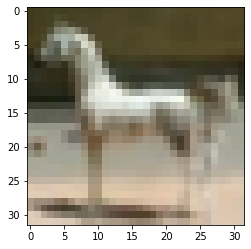

In [9]:
plt.imshow((x_train[150,:,:,:]+1)/2)

## architecture

In [14]:

if mode == 'build':

    gan = WGAN(input_dim = (32,32,3)
            , critic_conv_filters = [32,64,128,128]
            , critic_conv_kernel_size = [5,5,5,5]
            , critic_conv_strides = [2,2,2,1]
            , critic_batch_norm_momentum = None
            , critic_activation = 'leaky_relu'
            , critic_dropout_rate = None
            , critic_learning_rate = 0.00005
            , generator_initial_dense_layer_size = (4, 4, 128)
            , generator_upsample = [2,2, 2,1]
            , generator_conv_filters = [128,64,32,3]
            , generator_conv_kernel_size = [5,5,5,5]
            , generator_conv_strides = [1,1, 1,1]
            , generator_batch_norm_momentum = 0.8
            , generator_activation = 'leaky_relu'
            , generator_dropout_rate = None
            , generator_learning_rate = 0.00005
            , optimiser = 'rmsprop'
            , z_dim = 100
            )
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))








In [11]:
gan.critic.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 critic_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 critic_conv_0 (Conv2D)      (None, 16, 16, 32)        2432      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 32)        0         
                                                                 
 critic_conv_1 (Conv2D)      (None, 8, 8, 64)          51264     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 64)          0         
                                                                 
 critic_conv_2 (Conv2D)      (None, 4, 4, 128)         204928    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 4, 4, 128)         0     

In [12]:
gan.generator.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 generator_input (InputLayer  [(None, 100)]            0         
 )                                                               
                                                                 
 dense_1 (Dense)             (None, 2048)              206848    
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 2048)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 8, 8, 128)        0   

## training

In [13]:
BATCH_SIZE = 128
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5
N_CRITIC = 5
CLIP_THRESHOLD = 0.01

In [ ]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , clip_threshold = CLIP_THRESHOLD
)

Streaming output truncated to the last 5000 lines.
INFO:tensorflow:Assets written to: ram://84149663-db4b-4998-81f1-ab394fca4eca/assets
501 [D loss: (-0.011)(R -0.105, F 0.083)]  [G loss: -0.062] 
502 [D loss: (-0.016)(R -0.106, F 0.075)]  [G loss: -0.061] 
503 [D loss: (-0.015)(R -0.110, F 0.079)]  [G loss: -0.068] 
504 [D loss: (-0.002)(R -0.101, F 0.097)]  [G loss: -0.084] 
505 [D loss: (-0.000)(R -0.100, F 0.099)]  [G loss: -0.079] 
INFO:tensorflow:Assets written to: ram://061d9c19-0e3d-40fd-b6d7-335a43e75b20/assets
INFO:tensorflow:Assets written to: ram://507f4cb4-5a40-495d-b12c-afcce4218b5f/assets
INFO:tensorflow:Assets written to: ram://615fb7d2-981a-4271-bb6d-3ee8cebb2ec0/assets
506 [D loss: (-0.006)(R -0.103, F 0.090)]  [G loss: -0.074] 
507 [D loss: (-0.000)(R -0.101, F 0.101)]  [G loss: -0.084] 
508 [D loss: (-0.004)(R -0.106, F 0.099)]  [G loss: -0.093] 
509 [D loss: (0.002)(R -0.100, F 0.104)]  [G loss: -0.092] 
510 [D loss: (0.003)(R -0.096, F 0.101)]  [G loss: -0.087] 
I

In [15]:
gan.sample_images(RUN_FOLDER)

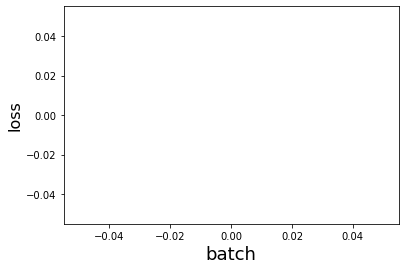

In [16]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

# plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()

In [17]:
def compare_images(img1, img2):
    return np.mean(np.abs(img1 - img2))

In [18]:

r, c = 5, 5

idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
true_imgs = (x_train[idx] + 1) *0.5

fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(true_imgs[cnt], cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1
fig.savefig(os.path.join(RUN_FOLDER, "images/real.png"))
plt.close()

NameError: ignored

In [ ]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r * c, gan.z_dim))
gen_imgs = gan.generator.predict(noise)

#Rescale images 0 - 1

gen_imgs = 0.5 * (gen_imgs + 1)
# gen_imgs = np.clip(gen_imgs, 0, 1)

fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(np.squeeze(gen_imgs[cnt, :,:,:]), cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1
fig.savefig(os.path.join(RUN_FOLDER, "images/sample.png"))
plt.close()


fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        c_diff = 99999
        c_img = None
        for k_idx, k in enumerate((x_train + 1) * 0.5):
            
            diff = compare_images(gen_imgs[cnt, :,:,:], k)
            if diff < c_diff:
                c_img = np.copy(k)
                c_diff = diff
        axs[i,j].imshow(c_img, cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1

fig.savefig(os.path.join(RUN_FOLDER, "images/sample_closest.png"))
plt.close()

In [20]:
!zip -r /content/images.zip /content/GDL_code/run/gan/0002_horses/images

  adding: content/GDL_code/run/gan/0002_horses/images/ (stored 0%)
  adding: content/GDL_code/run/gan/0002_horses/images/sample_445.png (deflated 9%)
  adding: content/GDL_code/run/gan/0002_horses/images/sample_1775.png (deflated 9%)
  adding: content/GDL_code/run/gan/0002_horses/images/sample_865.png (deflated 9%)
  adding: content/GDL_code/run/gan/0002_horses/images/sample_1205.png (deflated 9%)
  adding: content/GDL_code/run/gan/0002_horses/images/sample_65.png (deflated 9%)
  adding: content/GDL_code/run/gan/0002_horses/images/sample_1420.png (deflated 9%)
  adding: content/GDL_code/run/gan/0002_horses/images/sample_1140.png (deflated 9%)
  adding: content/GDL_code/run/gan/0002_horses/images/sample_135.png (deflated 10%)
  adding: content/GDL_code/run/gan/0002_horses/images/sample_810.png (deflated 9%)
  adding: content/GDL_code/run/gan/0002_horses/images/sample_1680.png (deflated 9%)
  adding: content/GDL_code/run/gan/0002_horses/images/sample_2400.png (deflated 9%)
  adding: cont